1. Load in the dataset, calling it drinks_content, and then briefly explore it, printing out: first 5 rows, last 5 rows, and then all of the data. Find out the dimensions of the data (number of rows and columns) and the column names.

In [13]:
import pandas as pd
import numpy as np

In [3]:
drinks_content = pd.read_csv("data/starbucks_drinkMenu_expanded.csv")

In [7]:
drinks_content.shape

(242, 18)

In [8]:
drinks_content.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

2. We’re going to be looking at the number of Calories in each drink. Calculate some quick summary statistics to check the mean, the variance, and the normality of this variable (i.e. plot a histogram).

In [11]:
drinks_content["Calories"].mean()

193.87190082644628

In [16]:
np.var(drinks_content["Calories"])

10537.136483163713

In [17]:
np.std(drinks_content["Calories"])

102.65055520143919

In [19]:
%matplotlib inline

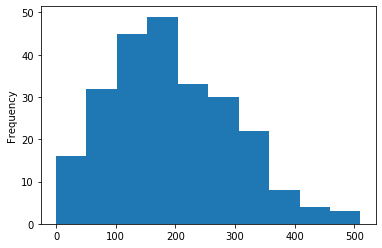

In [20]:
drinks_content["Calories"].plot(kind = "hist")

3. Check if you have any outliers in the Calories variable by creating a box plot. (There is no need to change or remove any outliers you find)


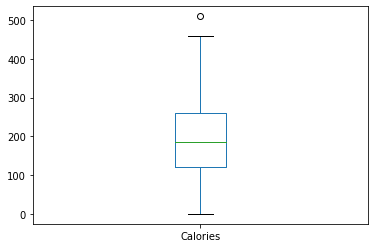

In [21]:
drinks_content["Calories"].plot(kind = "box")

4. Select the variables Beverage_category, Beverage, Beverage prep and Calories from the drinks_content data frame, and assign the selected columns to a new data frame called drinks. Check if there are any NaN values anywhere in the data, and drop any rows containing them.

In [22]:
drinks = drinks_content[["Beverage_category", "Beverage", "Beverage_prep", "Calories"]]

In [31]:
drinks.isnull().sum()

Beverage_category    0
Beverage             0
Beverage_prep        0
Calories             0
dtype: int64

5. Filter the data so we only take “Classic Espresso Drinks”, and save this in a new data frame called espresso_drinks.

In [35]:
drinks["Beverage_category"].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [39]:
espresso_drinks = drinks.loc[drinks["Beverage_category"] == "Classic Espresso Drinks"]
espresso_drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150


6. Group your espresso_drinks data frame by the type of beverage prep, and then find out the mean calories for each drink group.

In [42]:
espresso_drinks.groupby("Beverage_prep")["Calories"].mean()

Beverage_prep
2% Milk               184.375
Doppio                 10.000
Grande                 15.000
Grande Nonfat Milk    150.000
Short                   5.000
Short Nonfat Milk      78.000
Solo                    5.000
Soymilk               151.250
Tall                   10.000
Tall Nonfat Milk      116.000
Venti                  25.000
Venti Nonfat Milk     194.000
Name: Calories, dtype: float64

7. Get the same grouped mean Calories values as above, but this time sorted in descending order.


In [47]:
espresso_drinks.groupby("Beverage_prep")["Calories"].mean().sort_values(ascending = False)

Beverage_prep
Venti Nonfat Milk     194.000
2% Milk               184.375
Soymilk               151.250
Grande Nonfat Milk    150.000
Tall Nonfat Milk      116.000
Short Nonfat Milk      78.000
Venti                  25.000
Grande                 15.000
Tall                   10.000
Doppio                 10.000
Solo                    5.000
Short                   5.000
Name: Calories, dtype: float64

2 Extension
Now, play around with the data yourself. Is there anything surprising facts from the data? Any interesting plots you can make?

In [48]:
by_beverage = drinks.groupby("Beverage")["Calories"].max()
by_beverage

Beverage
Banana Chocolate Smoothie                              300
Brewed Coffee                                            5
Caffè Americano                                         25
Caffè Latte                                            240
Caffè Mocha (Without Whipped Cream)                    340
Cappuccino                                             150
Caramel                                                200
Caramel (Without Whipped Cream)                        370
Caramel Apple Spice (Without Whipped Cream)            360
Caramel Macchiato                                      300
Coffee                                                 350
Espresso                                                10
Hot Chocolate (Without Whipped Cream)                  380
Iced Brewed Coffee (With Classic Syrup)                130
Iced Brewed Coffee (With Milk & Classic Syrup)         180
Java Chip                                              290
Java Chip (Without Whipped Cream)              

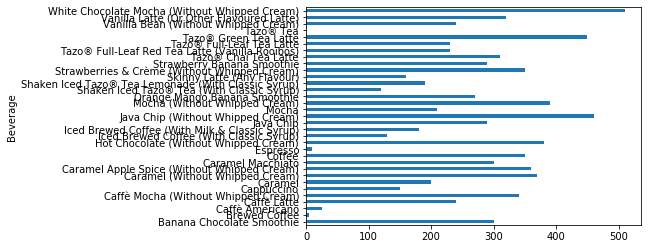

In [50]:
by_beverage.plot(kind = "barh")